In [1]:
'''
apply logistic regression model to predict the purchase of company's newly lauched Product Hint:
the dataset contains informations of users from a company's database. it contains information about UserID,
Gender, Age, Estimated Salary,Item Purchased. we are using this dataset for predicting that 
a user will purchase the company's newly launched product or not
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


In [3]:
dataset = pd.read_csv("User_Data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User_ID          19 non-null     float64
 1   Gender           19 non-null     object 
 2   Age              19 non-null     int64  
 3   EstimatedSalary  19 non-null     int64  
 4   Purchased        19 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 888.0+ bytes


In [4]:
x = dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
print(x_train[0:10,:])

[[ 2.149452   -1.02601437]
 [-0.28717375  0.70708966]
 [-1.26182405  0.4720925 ]
 [-0.40900504 -0.49727077]
 [-0.28717375 -0.0566511 ]
 [ 0.32198269 -1.23163688]
 [ 0.68747655  0.14897141]
 [ 0.32198269  2.6458162 ]
 [ 1.90578942 -0.99663973]
 [-0.40900504 -0.23289897]]


In [7]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)


In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4 0]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


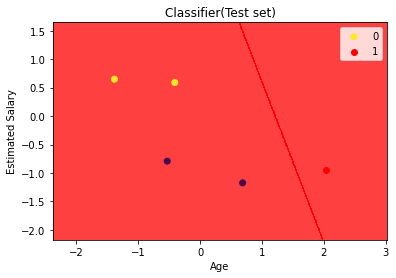

In [9]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01), 
                     np.arange(start = X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap("red", "green"))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1], c = ListedColormap("red", "green")(i),label = j)
    
plt.title("Classifier(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()